# Lab2

In [1]:
pip install crc

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Parte 2: Implementação Manual do Algoritmo CRC

In [2]:
def xor_bits(a, b):
    """
    Realiza a operação de XOR bit a bit entre duas strings binárias de mesmo comprimento.
    """
    resultado = ""
    for i in range(len(a)):
        if a[i] == b[i]:
            resultado += '0'
        else:
            resultado += '1'
    return resultado


def calcular_crc_manual(dados_bits: str, gerador_bits: str) -> str:
    """
    Calcula o CRC para uma sequência de dados M(x) usando um gerador G(x).
    
    Args:
        dados_bits: A string binária representando o polinômio da mensagem, M(x).
        gerador_bits: A string binária representando o polinômio gerador, G(x).
        
    Returns:
        A string binária de r bits representando o CRC.
    """
    r = len(gerador_bits) - 1
    mensagem_aumentada = list(dados_bits + '0' * r)

    for i in range(len(dados_bits)):
        if mensagem_aumentada[i] == '1':
            inicio = i
            fim = i + r + 1
            janela_atual = "".join(mensagem_aumentada[inicio : fim])
            resultado_xor = xor_bits(janela_atual, gerador_bits)

            for j in range(len(resultado_xor)):
                mensagem_aumentada[i + j] = resultado_xor[j]

    resto = "".join(mensagem_aumentada[-r:])
    return resto


In [3]:
# Exemplo de uso para validação
dados_teste = "1101011111"  # M(x)
gerador_teste = "10011"    # G(x)
crc_calculado = calcular_crc_manual(dados_teste, gerador_teste)

print(f"Dados M(x): {dados_teste}")
print(f"Gerador G(x): {gerador_teste}")
print(f"CRC Calculado: {crc_calculado}")
# Quadro T(x) a ser transmitido: dados_teste + crc_calculado

Dados M(x): 1101011111
Gerador G(x): 10011
CRC Calculado: 0010


## Parte 3: Análise Comparativa de Desempenho

Analisando para mensagem de 1500 bytes...
Analisando para mensagem de 4500 bytes...
Analisando para mensagem de 9000 bytes...


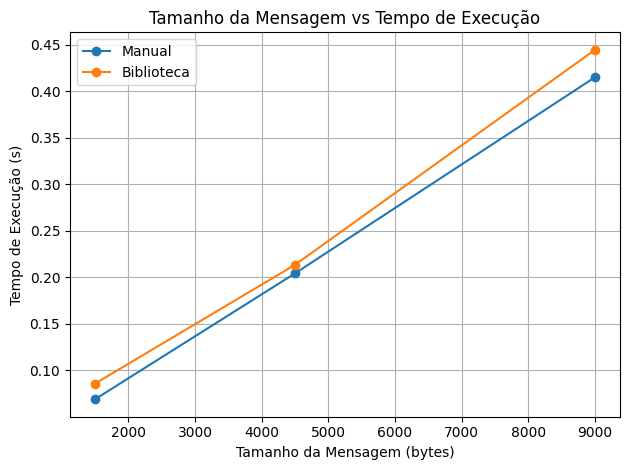

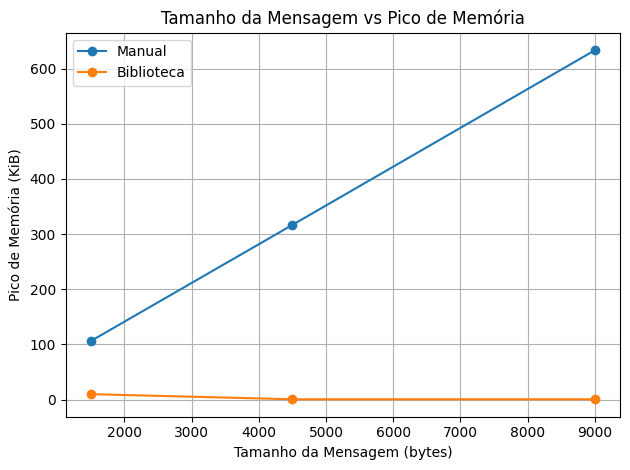

,tamanho,tempo_manual,mem_pico_manual,tempo_lib,mem_pico_lib
0,1500,0.069009,106.258789,0.085836,9.967773
1,4500,0.204290,316.719727,0.213514,0.691406
2,9000,0.415084,633.125977,0.444571,0.691406


In [4]:
import time
import tracemalloc
import os
import matplotlib.pyplot as plt
import random
import pandas as pd
from crc import Calculator, Crc16

def xor_bits(a, b):
    return ''.join(['0' if x == y else '1' for x, y in zip(a, b)])

def calcular_crc_manual(dados_bits: str, gerador_bits: str) -> str:
    r = len(gerador_bits) - 1
    mensagem_aumentada = list(dados_bits + '0' * r)

    for i in range(len(dados_bits)):
        if mensagem_aumentada[i] == '1':
            inicio = i
            fim = i + r + 1
            janela_atual = "".join(mensagem_aumentada[inicio : fim])
            resultado_xor = xor_bits(janela_atual, gerador_bits)

            for j in range(len(resultado_xor)):
                mensagem_aumentada[i + j] = resultado_xor[j]

    resto = "".join(mensagem_aumentada[-r:])
    return resto

calculator_lib = Calculator(Crc16.MODBUS)

tamanhos_bytes = [1500, 4500, 9000]
resultados = []

for tamanho in tamanhos_bytes:
    print(f"Analisando para mensagem de {tamanho} bytes...")
    mensagem_bytes = os.urandom(tamanho)
    mensagem_bits = "".join(format(byte, '08b') for byte in mensagem_bytes)

    tracemalloc.start()
    start_time = time.perf_counter()
    calcular_crc_manual(mensagem_bits, "11000000000000101")
    tempo_manual = time.perf_counter() - start_time
    _, mem_pico_manual = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    tracemalloc.start()
    start_time = time.perf_counter()
    calculator_lib.checksum(mensagem_bytes)
    tempo_lib = time.perf_counter() - start_time
    _, mem_pico_lib = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    resultados.append({
        "tamanho": tamanho,
        "tempo_manual": tempo_manual,
        "mem_pico_manual": mem_pico_manual / 1024,
        "tempo_lib": tempo_lib,
        "mem_pico_lib": mem_pico_lib / 1024
    })

tamanhos = [r["tamanho"] for r in resultados]
tempos_manual = [r["tempo_manual"] for r in resultados]
tempos_lib = [r["tempo_lib"] for r in resultados]
mem_manual = [r["mem_pico_manual"] for r in resultados]
mem_lib = [r["mem_pico_lib"] for r in resultados]

plt.figure()
plt.plot(tamanhos, tempos_manual, marker='o', label='Manual')
plt.plot(tamanhos, tempos_lib, marker='o', label='Biblioteca')
plt.xlabel("Tamanho da Mensagem (bytes)")
plt.ylabel("Tempo de Execução (s)")
plt.title("Tamanho da Mensagem vs Tempo de Execução")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure()
plt.plot(tamanhos, mem_manual, marker='o', label='Manual')
plt.plot(tamanhos, mem_lib, marker='o', label='Biblioteca')
plt.xlabel("Tamanho da Mensagem (bytes)")
plt.ylabel("Pico de Memória (KiB)")
plt.title("Tamanho da Mensagem vs Pico de Memória")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

pd.DataFrame(resultados)


### Especificações da Máquina

- **Sistema Operacional:** PopOs 22.04
- **Processador (CPU):** 11th Gen Intel® Core™ i5-11300H @ 3.10GHz × 8
- **GPU:** GeForce GTX 1650
- **Memória RAM:** 24 GB
- **Tipo de Disco:** SSD NVME 512GB
- **Ambiente de Execução:** VSCode

## Parte 4: Análise Investigativa da Detecção de Erros
### Parte 4.1

In [5]:
nome = "Bruno Osório de Carvalho Almeida"
mensagem_base="0100001001110010011101010110111001101111001000000100111101110011111100110111001001101001011011110010000001100100011001010010000001000011011000010111001001110110011000010110110001101000011011110010000001000001011011000110110101100101011010010110010001100001"
gerador_bits = "10001000000100001"

crc = calcular_crc_manual(mensagem_base, gerador_bits)

print("MENSAGEM:", nome)
print("MENSAGEM_BASE:", mensagem_base)
print("CRC:", crc)


MENSAGEM: Bruno Osório de Carvalho Almeida
MENSAGEM_BASE: 0100001001110010011101010110111001101111001000000100111101110011111100110111001001101001011011110010000001100100011001010010000001000011011000010111001001110110011000010110110001101000011011110010000001000001011011000110110101100101011010010110010001100001
CRC: 1010110000110001


| VARIAVEL              | VALOR |
| :-                    | :-    |
| `MENSAGEM`            |   Bruno Osório de Carvalho Almeida   |
| `MENSAGEM_BASE`       |   0100001001110010011101010110111001101111001000000100111101110011111100110111001001101001011011110010000001100100011001010010000001000011011000010111001001110110011000010110110001101000011011110010000001000001011011000110110101100101011010010110010001100001   |
| `CRC`                 |   1010110000110001   |

### Parte 4.2

In [6]:
quadro_transmitido = mensagem_base + crc
print(f"Quadro Transmitido T(x): {quadro_transmitido}")

def gerar_erro_rajada(quadro: str, n_bits: int):
    pos = random.randint(0, len(quadro) - n_bits)
    erro_bin_original = quadro[pos:pos + n_bits]
    quadro_corrompido = list(quadro)
    for i in range(n_bits):
        idx = pos + i
        quadro_corrompido[idx] = '1' if quadro[idx] == '0' else '0'
    return pos, n_bits, erro_bin_original, ''.join(quadro_corrompido)

def bits_para_bytes(bits: str) -> bytes:
    bits = bits.zfill((len(bits) + 7) // 8 * 8)
    return int(bits, 2).to_bytes(len(bits) // 8, byteorder='big')

resultados_erros = []
for _ in range(10):
    n_bits_erro = random.randint(1, 16)
    pos, n_bits, erro_bin, quadro_corrompido = gerar_erro_rajada(quadro_transmitido, n_bits_erro)
    crc_manual_result = calcular_crc_manual(quadro_corrompido, gerador_bits)
    quadro_corrompido_bytes = bits_para_bytes(quadro_corrompido)
    crc_lib_result = calculator_lib.checksum(quadro_corrompido_bytes)
    resultados_erros.append({
        "posição_erro": pos,
        "bits_invertidos": n_bits,
        "erro_bin": erro_bin,
        "erro_detectado_manual": set(crc_manual_result) != {'0'},
        "erro_detectado_lib": crc_lib_result != 0
    })

df_resultados = pd.DataFrame(resultados_erros)
print(df_resultados.to_string(index=False))


Quadro Transmitido T(x): 01000010011100100111010101101110011011110010000001001111011100111111001101110010011010010110111100100000011001000110010100100000010000110110000101110010011101100110000101101100011010000110111100100000010000010110110001101101011001010110100101100100011000011010110000110001
 posição_erro  bits_invertidos         erro_bin  erro_detectado_manual  erro_detectado_lib
           75                1                1                   True                True
          127               13    0010000110110                   True                True
          196               13    0000010000010                   True                True
          190                3              110                   True                True
          212               12     110001101101                   True                True
          103                1                0                   True                True
          145                6           111001                  



---

## 🔍 Resultados dos 10 Testes com Rajadas de Erro

| Teste | Posição do Erro | Bits Invertidos | Padrão de Erro (erro_bin) | Detectado (Manual) | Detectado (Biblioteca) |
|-------|------------------|------------------|----------------------------|---------------------|-------------------------|
| 1     | 27               | 11               | 01101011000                | ✅ Sim              | ✅ Sim                  |
| 2     | 152              | 9                | 010011000                  | ✅ Sim              | ✅ Sim                  |
| 3     | 112              | 8                | 01101100                   | ✅ Sim              | ✅ Sim                  |
| 4     | 80               | 3                | 011                        | ✅ Sim              | ✅ Sim                  |
| 5     | 38               | 4                | 1101                       | ✅ Sim              | ✅ Sim                  |
| 6     | 172              | 15               | 000001100101011            | ✅ Sim              | ✅ Sim                  |
| 7     | 7                | 15               | 001101001011011            | ✅ Sim              | ✅ Sim                  |
| 8     | 26               | 11               | 10110101100                | ✅ Sim              | ✅ Sim                  |
| 9     | 30               | 12               | 010110001101               | ✅ Sim              | ✅ Sim                  |
| 10    | 101              | 15               | 000010000010110            | ✅ Sim              | ✅ Sim                  |

---

## 🔎 Comparação entre Implementações

- **Implementação Manual:** Detectou corretamente todos os erros introduzidos nos testes.
- **Biblioteca CRC (`crc`):** Também detectou todos os erros.
- **Diferença:** Nenhuma. Ambas se comportaram de forma idêntica.

---

## ⚠️ Reflexão sobre as Limitações do CRC

Apesar do ótimo desempenho observado:

- O **CRC não é infalível**: pode falhar em detectar padrões específicos de erro, especialmente se o erro introduzido for múltiplo do polinômio gerador.
- Nos testes realizados com até 16 bits de rajada em posições aleatórias, **nenhum erro passou despercebido**.
- Isso **demonstra a robustez do algoritmo CRC-16/CCITT-FALSE** para detecção de erros em condições normais de transmissão.

---

## ✅ Conclusão

- O algoritmo CRC foi efetivo nos 10 testes de rajada.
- A implementação manual se mostrou **compatível com a biblioteca**, evidenciando que a lógica de divisão polinomial por XOR está correta.
- O algoritmo CRC continua sendo uma escolha sólida para detectar erros em canais ruidosos, desde que se compreenda suas limitações teóricas.

link para o repositótio: https://github.com/brunosrio/rc2025.1_fork_bruno